<a href="https://colab.research.google.com/github/nadiaff25/Nadia-Fitriani/blob/main/TugasBesar_Prak_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [181]:
#Nama dataframe kita adalah df yang berisi data dari harga_rumah.csv 
#Hanya menggunakan kolom lahan dan harga
df = pd.read_csv('harga_rumah.csv',usecols=['harga','luas'])

In [111]:
#Melihat 5 baris teratas dari data 
#Independent variabel(x) adalah harga
#Dependent variabel(y) adalah luas
df.head()


,harga,luas
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [112]:
#Mengetahui jumlah kolom dan baris dari data 
#kita mempunyai 2 kolom dengan 545 baris
df.shape

(545, 2)

In [113]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan, dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   harga   545 non-null    int64
 1   luas    545 non-null    int64
dtypes: int64(2)
memory usage: 8.6 KB


In [114]:
#Melihat statistical description dari data mulai dari mean, kuartill, standard deviation dll.
df.describe()

,harga,luas
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [115]:
#Mencari dan menangani missing values
#Ternyata data kita tidak ada missing values
df.isnull().sum()

harga    0
luas     0
dtype: int64

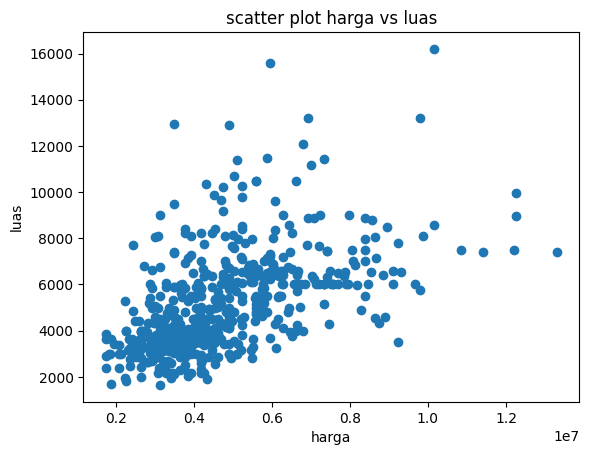

In [116]:
#Bivariate analysis harga dan luas
#Menggunakan scatter plot 
plt.scatter(df['harga'], df['luas'])
plt.xlabel('harga')
plt.ylabel('luas')
plt.title('scatter plot harga vs luas')
plt.show()

In [117]:
#Mengetahui nilai korelasi dari harga dan luas
#Nilai korelasinya adalah 0.53
df.corr()

,harga,luas
harga,1.000000,0.535997
luas,0.535997,1.000000


In [118]:
#Recall data kita
df.head()

,harga,luas
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


In [119]:
#Pertama, buat variabel x dan y
x = df['harga'].values.reshape(-1,1)
y = df['luas'].values.reshape(-1,1)

In [171]:
#Kedua, kita split menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.65)

In [172]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [173]:
#Keempat, train the model menggunakan training data yang udah di split
lin_reg.fit(x_train, y_train)

LinearRegression()

In [174]:
#Kelima, cari tahu nilai slope/koefisien (m) dari intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[0.00054281]]
[2497.7409488]


In [176]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah di split
lin_reg.score(x_test, y_test)

0.28569245199104265

Text(0.5, 1.0, 'plot harga vs luas')

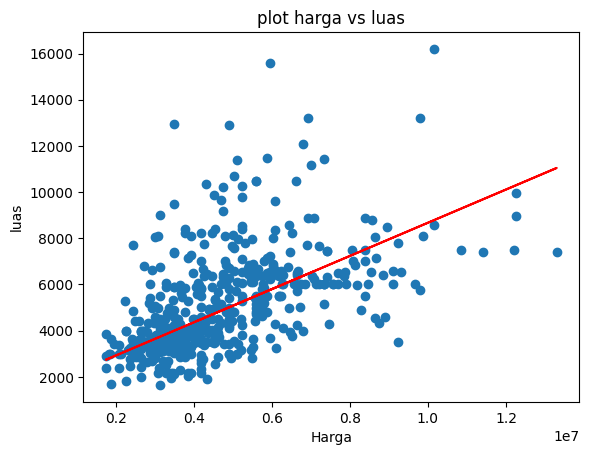

In [125]:
#Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
#Garis merah merupakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Harga')
plt.ylabel('luas')
plt.title('plot harga vs luas')

In [126]:
#Prediksi luas rumah dengan harga 100
lin_reg.predict([[100]])

array([[1480.52876657]])

In [127]:
#Prediksi luas rumah dengan harga 150
lin_reg.predict([[150]])

array([[1480.56472808]])

In [128]:
#Prediksi luas rumah dengan harga 200
lin_reg.predict([[200]])

array([[1480.60068958]])